# Energy Data Parser
- Gets the energy data into a dataframe ready for analytics
- Does not perform any analysis or non-reversible mods

### Todo
- Convert missing cells (?) to NaN
- ~~Investigate NaT indices -- fix if possible~~
    - Times are reported in DD/MM/YYYY format, and are strictly reported every minute over the entire dataset

### Scope for *next* notebook
- outliers
- trend analysis for bad points
- interpolate/resample for missing cells
- ???

In [572]:
# Preliminary setup
import pandas as pd
import zipfile
import os
dataname = 'household_power_consumption'
# There are c. 2.e6 rows in this file.
# nskiprows = int(1.1e5)
nskiprows = 0
# readrows = int(1.e5)
readrows = None # Comment out for smaller test load.

# Extract zip if necessary
if not os.path.isfile(dataname + '.txt'):
    zip_ref = zipfile.ZipFile('src/' + dataname +'.zip', 'r')
    zip_ref.extractall('.')
    zip_ref.close()

In [573]:
# Import into dataframe
csv_labels = ['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
namelist = ['date','time','active','reactive','volts','amps','sub1','sub2','sub3']

df = pd.read_csv(dataname + '.txt'
                ,delimiter=';'
                ,nrows=readrows
                ,skiprows=nskiprows
                ,header=0
                ,names=namelist
                ,parse_dates=[['date', 'time']]
                ,dayfirst=True
                ,low_memory=!(nskiprows == 0 || readrows is None)
                #,index_col='date_time'
                )

# Record the file line number of the row, and reindex on new datetime 
# df['rowno'] = df.index + 2 + nskiprows
df.set_index('date_time',inplace=True,drop=True)
df.index.rename('dtime',inplace=True)

In [15]:
# Show rows with nulls
dfnulls = df[df.isnull().any(axis=1)]
dfnulls

,active,reactive,volts,amps,sub1,sub2,sub3
dtime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN
2007-01-28 17:13:00,?,?,?,?,?,?,NaN
2007-02-22 22:58:00,?,?,?,?,?,?,NaN
2007-02-22 22:59:00,?,?,?,?,?,?,NaN
2007-03-25 17:52:00,?,?,?,?,?,?,NaN


In [16]:
# How many rows have a missing sample?
n_missing = sum(df.isnull().any(axis=1))
n_missing

25979

In [13]:
# What percentage of rows is missing samples?
"{}%".format(round(n_missing / len(df) * 100, 4))

'1.2518%'

In [18]:
# How strict is the index, ie. what is the time difference between consecutive elements?
from collections import Counter
deltas = [d for d in map(lambda a: a[1] - a[0], zip(df.index, df.index[1:]))]
Counter(deltas)

Counter({Timedelta('0 days 00:01:00'): 2075258})

In [582]:
# Look through Lag Plot for each column for patterns

import numpy
from pandas.plotting import lag_plot 

# Remove rows with '?'
df1 = df.replace({'?': numpy.nan}).dropna().astype(float)

# Set plot style
plt.style.use('ggplot')

# Lag plot for each column
for i in range(0, len(df.columns)-1):
    
    x = df1.iloc[:,i] # set column
    title = df.columns[i] + " lag 1 plot" # set title
    
    #fig = plt.figure()
    #fig.suptitle(title)
    #ax = plt.axes()
    #lag_plot(x)
    
    #fig = plt.figure()
    #fig.suptitle(title)
    #ax = plt.axes()
    #ax.plot(x[0:df1.shape[0]-1], x[1:df1.shape[0]], 'bo', markersize=1)

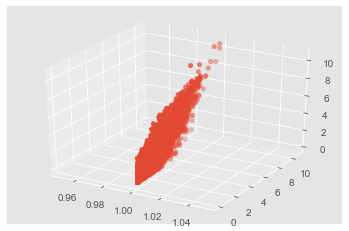

In [583]:
# Lag Lag Plots
from mpl_toolkits.mplot3d import Axes3D

x = df1.iloc[:,0]

a = pd.DataFrame({'A' : numpy.array([1] * df1.shape[0],dtype='int32'),
                 'B' : x,
                 'C' : x.shift(1)})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a['A'], a['B'], a['C'])
#fig.suptitle(title)
